In [ ]:
!pip install scikit-learn matplotlib pandas numpy

In [6]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print("Ключи iris_dataset: \n {}".format(iris_dataset.keys()))

Ключи iris_dataset: 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
print(iris_dataset["DESCR"][:1000] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [8]:
print("Названия ответов {}".format(iris_dataset['target_names']))

Названия ответов ['setosa' 'versicolor' 'virginica']


In [9]:
print("Названия признаков {}".format(iris_dataset['feature_names']))

Названия признаков ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [11]:
print("Тип массива target: {}".format(type(iris_dataset['target'])))

Тип массива target: <class 'numpy.ndarray'>


In [12]:
print("Форма массива target: {}".format(iris_dataset['target'].shape))

Форма массива target: (150,)


In [14]:
print("Ответы\n{}".format(iris_dataset['target']))

Ответы
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [18]:
print("Форма массива X_train: {}".format(X_train.shape))
print("Форма массива y_train: {}".format(y_train.shape))

Форма массива X_train: (112, 4)
Форма массива y_train: (112,)


In [19]:
print("Форма массива X_test: {}".format(X_test.shape))
print("Форма массива y_test: {}".format(y_test.shape))

Форма массива X_test: (38, 4)
Форма массива y_test: (38,)


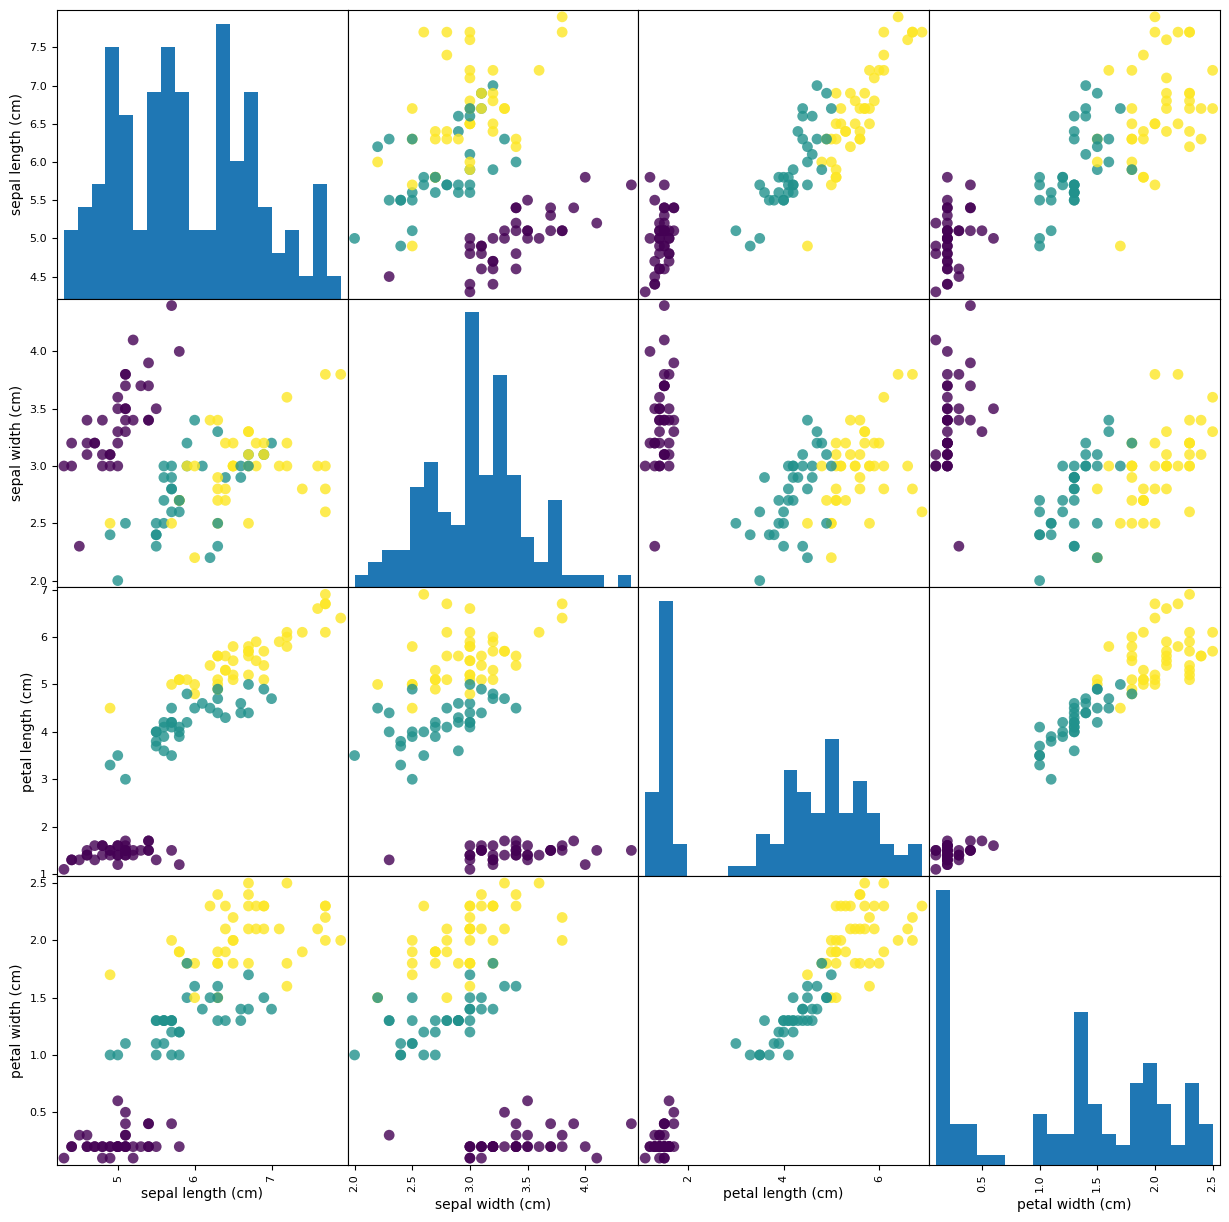

In [22]:
import pandas as pd
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
print("Форма массива X_new {}".format(X_new.shape))

Форма массива X_new (1, 4)


In [26]:
prediction = knn.predict(X_new)
print("Прогноз: {}".format(prediction))
print("Спрогнозированная метка: {}".format(
    iris_dataset['target_names'][prediction]))

Прогноз: [0]
Спрогнозированная метка: ['setosa']


In [27]:
y_pred = knn.predict(X_test)
print("Прогнозы для тестового набора:\n {}".format(y_pred))

Прогнозы для тестового набора:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [28]:
print("Правильность на тестовом наборе: {:.2f}".format(np.mean(y_pred == y_test)))

Правильность на тестовом наборе: 0.97


In [29]:
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе: 0.97


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Загрузка датасетов
digits = load_digits()
wine = load_wine()
breast_cancer = load_breast_cancer()

# Изучение данных
datasets = {'Digits': digits, 'Wine': wine, 'Breast Cancer': breast_cancer}
for name, dataset in datasets.items():
    print(f"\n{name} dataset:")
    print("Features shape:", dataset.data.shape)
    print("Labels shape:", dataset.target.shape)
    print("Feature names:", dataset.feature_names if hasattr(dataset, 'feature_names') else "N/A")
    print("Classes:", dataset.target_names)

# Функция для подготовки, обучения и оценки модели
def process_and_evaluate(dataset, test_size=0.2, random_state=42):
    # Разделение на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=test_size, random_state=random_state)
    
    # Исследование данных с помощью визуализации
    plt.figure(figsize=(10, 6))
    if dataset == digits:
        # Визуализация нескольких изображений из датасета digits
        for i in range(10):
            plt.subplot(2, 5, i + 1)
            plt.imshow(X_train[i].reshape(8, 8), cmap='gray')
            plt.axis('off')
        plt.suptitle('Digits Samples')
    else:
        sns.heatmap(pd.DataFrame(X_train, columns=dataset.feature_names).corr(), annot=True, cmap='coolwarm')
        plt.title(f"{dataset.DESCR.splitlines()[0]} - Correlation Matrix")
    plt.show()
    
    # Обучение модели k-ближайших соседей
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    
    # Прогноз
    y_pred = knn.predict(X_test)
    
    # Оценка качества модели
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=dataset.target_names))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Выполнение для каждого набора данных
for name, dataset in datasets.items():
    print(f"\nProcessing {name} dataset:")
    process_and_evaluate(dataset)


In [89]:
# 1. Digits dataset
from sklearn.datasets import load_digits
digits_dataset = load_digits()
print('Keys of digit dataset: \n {}'.format(digits_dataset.keys()))

Keys of digit dataset: 
 dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [7]:
print(digits_dataset["DESCR"] + "\n...")

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [10]:
print('The names of answers: {}'.format(digits_dataset['target_names']))

The answers: [0 1 2 3 4 5 6 7 8 9]


In [11]:
print('The names of features: {}'.format(digits_dataset['feature_names']))

The features: ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [12]:
print('Type of "target" array: {}'.format(type(digits_dataset['target'])))

Type of "target" array: <class 'numpy.ndarray'>


In [13]:
print('Form of "target" array: {}'.format(digits_dataset['target'].shape))

Form of "target" array: (1797,)


In [18]:
print('The answers: \n {}'.format(digits_dataset['target'][:100]))

The answers: 
 [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1]


In [20]:
print('The data: \n {}'.format(digits_dataset['data'][:10]))

The data: 
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits_dataset['data'], digits_dataset['target'], random_state=0)

In [22]:
print('"X_train" array form: {}'.format(X_train.shape))
print('"y_train" array form:: {}'.format(y_train.shape))

"X_train" array form: (1347, 64)
"y_train" array form:: (1347,)


In [23]:
print('"X_test" array form: {}'.format(X_test.shape))
print('"y_test" array form:: {}'.format(y_test.shape))

"X_test" array form: (450, 64)
"y_test" array form:: (450,)


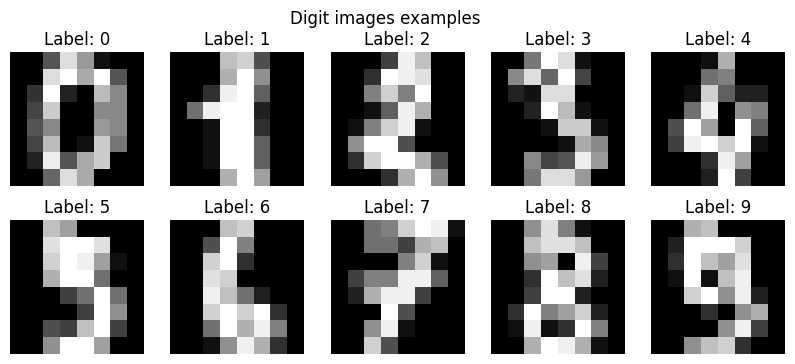

In [88]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for ax, image, label in zip(axes.ravel(), digits_dataset.images, digits_dataset.target):
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')
plt.suptitle('Digit images examples')
plt.show()

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [37]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [83]:
import numpy as np
X_new = digits_dataset.images[1600].reshape(1, -1)
print('"X_new" array\'s form {}'.format(X_new.shape))

"X_new" array's form (1, 64)


In [84]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted label: {}".format(
    digits_dataset['target_names'][prediction]))

Prediction: [2]
Predicted label: [2]


In [85]:
y_pred = knn.predict(X_test)
print('Predictions for test set: \n {}'.format(y_pred))

Predictions for test set: 
 [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 3 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 8 7 0 6 1 5 3 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 5 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 3 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 8 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 7 0 4 5 9 3 3 4 3 1 8 9 8 3 6 2 1 6 2
 1 7 5 5 1 9]


In [86]:
print("Correctness on a test set: {:.2f}".format(np.mean(y_pred == y_test)))

Correctness on a test set: 0.99


In [87]:
print("Correctness on a test set: {:.2f}".format(knn.score(X_test, y_test)))

Correctness on a test set: 0.99


In [90]:
# 2. Wine dataset
from sklearn.datasets import load_wine
wine_dataset = load_wine()
print('Keys of wine dataset: \n {}'.format(wine_dataset.keys()))

Keys of wine dataset: 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [91]:
print(wine_dataset["DESCR"] + "\n...")

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [92]:
print('The names of answers: {}'.format(wine_dataset['target_names']))

The names of answers: ['class_0' 'class_1' 'class_2']


In [93]:
print('The names of features: {}'.format(wine_dataset['feature_names']))

The names of features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [94]:
print('Type of "target" array: {}'.format(type(wine_dataset['target'])))

Type of "target" array: <class 'numpy.ndarray'>


In [95]:
print('Form of "target" array: {}'.format(wine_dataset['target'].shape))

Form of "target" array: (178,)


In [97]:
print('The answers: \n {}'.format(wine_dataset['target']))

The answers: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [98]:
print('The data: \n {}'.format(wine_dataset['data'][:10]))

The data: 
 [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]
 [1.420e+01 1.760e+00 2.450e+00 1.520e+01 1.120e+02 3.270e+00 3.390e+00
  3.400e-01 1.970e+00 6.750e+00 1.050e+00 2.850e+00 1.450e+03]
 [1.439e+01 1.870e+00 2.450e+00 1.460e+01 9.600e+01 2.500e+00 2.520e+00
  3.000e-01 1.980e+00 5.250e+00 1.020e+00 3.580e+00 1.290e+03]
 [1.406e+01 2.150e+00 2.610e+00 1.760e+01 1

In [100]:
X_train, X_test, y_train, y_test = train_test_split(wine_dataset['data'], wine_dataset['target'], random_state=0)

In [101]:
print('"X_train" array form: {}'.format(X_train.shape))
print('"y_train" array form:: {}'.format(y_train.shape))

"X_train" array form: (133, 13)
"y_train" array form:: (133,)


In [102]:
print('"X_test" array form: {}'.format(X_test.shape))
print('"y_test" array form:: {}'.format(y_test.shape))

"X_test" array form: (45, 13)
"y_test" array form:: (45,)


In [134]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [139]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

C:\Users\bread\AppData\Local\Temp\ipykernel_26012\3368795193.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=data, palette="viridis", legend=False)
C:\Users\bread\AppData\Local\Temp\ipykernel_26012\3368795193.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=data, palette="viridis", legend=False)
C:\Users\bread\AppData\Local\Temp\ipykernel_26012\3368795193.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=data, palette="viridis", legend=False)
C:\Users\b

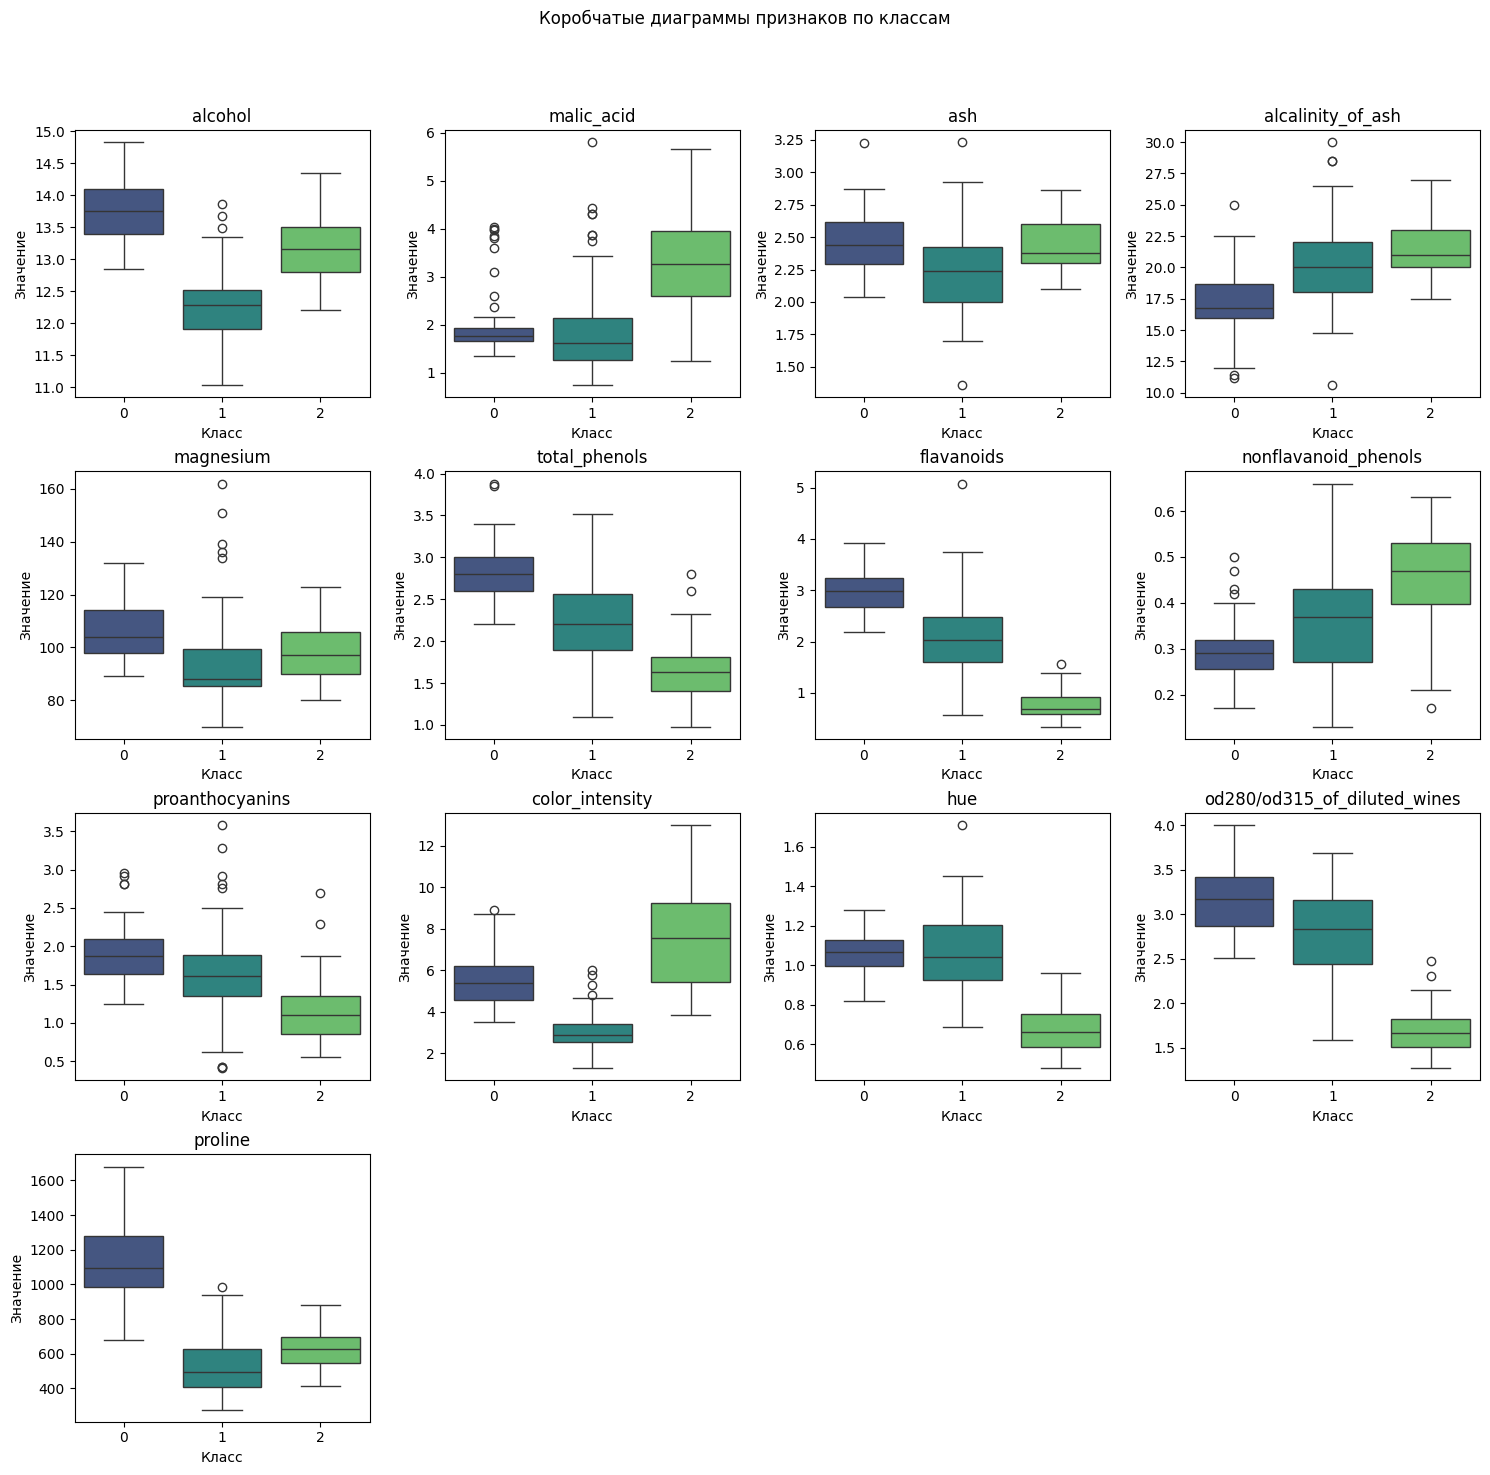

In [158]:
import pandas as pd

data = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)
data['target'] = wine_dataset.target
plt.figure(figsize=(15, 15))
for i, column in enumerate(wine_dataset.feature_names, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='target', y=column, data=data, palette="viridis", legend=False)
    plt.title(column)
    plt.xlabel('Класс')
    plt.ylabel('Значение')
plt.tight_layout()
plt.suptitle('Коробчатые диаграммы признаков по классам')
plt.subplots_adjust(top=0.9)
plt.show()

In [140]:
import numpy as np
X_new = np.random.rand(1, 13) * 10  

print("Randomly generated 'X_new' array: {}".format(X_new))
print("'X_new' array form: {}".format(X_new.shape))

Randomly generated 'X_new' array: [[2.96755873 8.22154931 8.52586397 7.65087559 9.4170509  4.576889
  7.09453928 2.51171005 7.3980343  1.54711036 3.67989678 7.58352405
  4.88545474]]
'X_new' array form: (1, 13)


In [141]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted label: {}".format(
    wine_dataset['target_names'][prediction]))

Prediction: [1]
Predicted label: ['class_1']


In [142]:
y_pred = knn.predict(X_test)
print('Predictions for test set: \n {}'.format(y_pred))

Predictions for test set: 
 [0 1 1 0 1 1 0 2 1 1 0 1 0 2 1 1 0 0 1 0 1 0 1 1 0 1 1 1 2 2 0 0 2 0 0 0 2
 1 1 1 2 0 1 1 1]


In [143]:
print("Correctness on a test set: {:.2f}".format(np.mean(y_pred == y_test)))

Correctness on a test set: 0.76


In [144]:
print("Correctness on a test set: {:.2f}".format(knn.score(X_test, y_test)))

Correctness on a test set: 0.76


In [146]:
# 3. Cancer dataset
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()
print('Keys of cancer dataset: \n {}'.format(cancer_dataset.keys()))

Keys of cancer dataset: 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [147]:
print(cancer_dataset["DESCR"] + "\n...")

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [149]:
print('The names of answers: {}'.format(cancer_dataset['target_names']))

The names of answers: ['malignant' 'benign']


In [150]:
print('The names of features: {}'.format(cancer_dataset['feature_names']))

The names of features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [151]:
print('Type of "target" array: {}'.format(type(cancer_dataset['target'])))

Type of "target" array: <class 'numpy.ndarray'>


In [152]:
print('Form of "target" array: {}'.format(cancer_dataset['target'].shape))

Form of "target" array: (569,)


In [153]:
print('The answers: \n {}'.format(cancer_dataset['target']))

The answers: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1

In [154]:
print('The data: \n {}'.format(cancer_dataset['data'][:10]))

The data: 
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.8

In [155]:
X_train, X_test, y_train, y_test = train_test_split(cancer_dataset['data'], cancer_dataset['target'], random_state=0)

In [156]:
print('"X_train" array form: {}'.format(X_train.shape))
print('"y_train" array form:: {}'.format(y_train.shape))

"X_train" array form: (426, 30)
"y_train" array form:: (426,)


In [157]:
print('"X_test" array form: {}'.format(X_test.shape))
print('"y_test" array form:: {}'.format(y_test.shape))

"X_test" array form: (143, 30)
"y_test" array form:: (143,)


In [159]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [160]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

C:\Users\bread\AppData\Local\Temp\ipykernel_26012\4174611390.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=data, palette="viridis", legend=False)
C:\Users\bread\AppData\Local\Temp\ipykernel_26012\4174611390.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=data, palette="viridis", legend=False)
C:\Users\bread\AppData\Local\Temp\ipykernel_26012\4174611390.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=column, data=data, palette="viridis", legend=False)
C:\Users\b

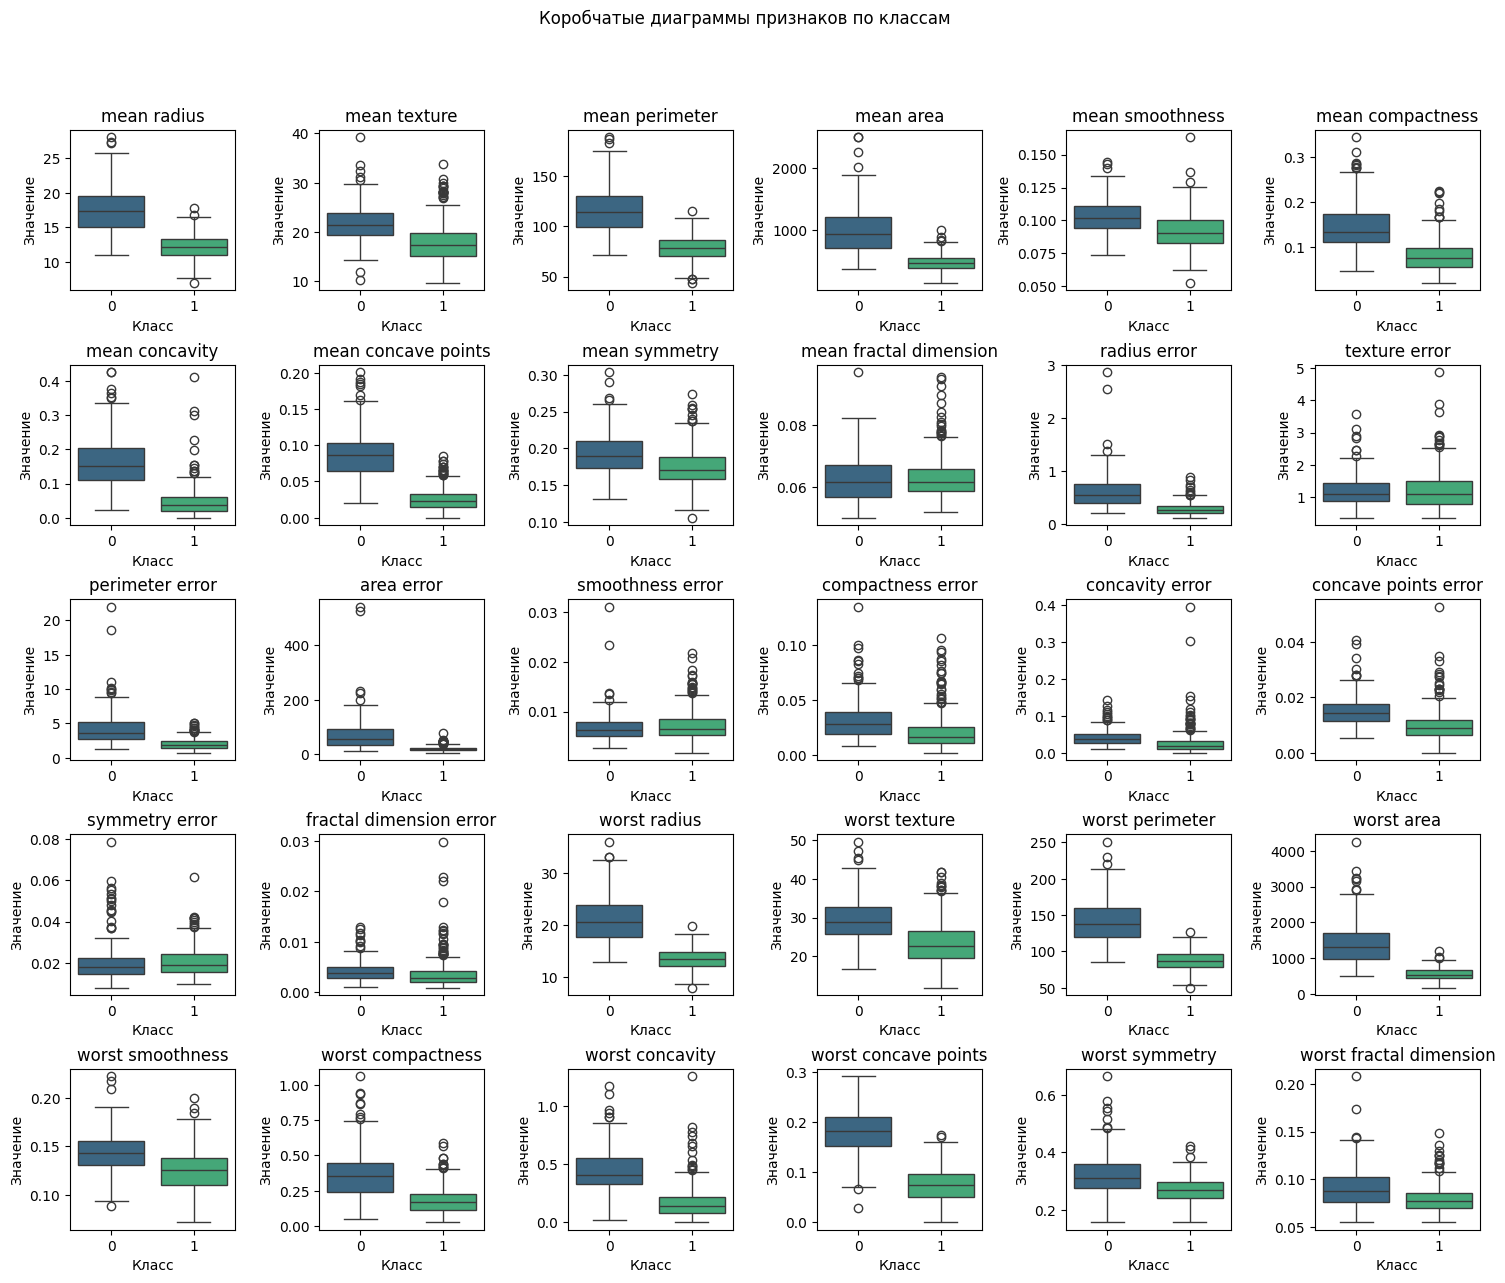

In [167]:
import pandas as pd

data = pd.DataFrame(cancer_dataset.data, columns=cancer_dataset.feature_names)
data['target'] = cancer_dataset.target
plt.figure(figsize=(15, 15))
for i, column in enumerate(cancer_dataset.feature_names, 1):
    plt.subplot(6, 6, i)
    sns.boxplot(x='target', y=column, data=data, palette="viridis", legend=False)
    plt.title(column)
    plt.xlabel('Класс')
    plt.ylabel('Значение')
    
plt.tight_layout()
plt.suptitle('Коробчатые диаграммы признаков по классам')
plt.subplots_adjust(top=0.9)
plt.show()

In [168]:
import numpy as np
X_new = np.random.rand(1, 30) * 10  

print("Randomly generated 'X_new' array: {}".format(X_new))
print("'X_new' array form: {}".format(X_new.shape))

Randomly generated 'X_new' array: [[3.07972947 4.42688698 7.12149835 5.83303121 1.07487451 4.07179037
  3.15861873 6.55171992 6.31429379 2.9973715  2.40415156 8.16515012
  9.52386489 7.66592452 5.01794655 5.38282228 5.34254242 9.02448507
  5.07768177 2.84099569 2.03250522 9.47079364 5.31549245 2.82162309
  7.55689645 5.33831001 5.50888412 4.32074468 2.33712645 1.82355813]]
'X_new' array form: (1, 30)


In [169]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted label: {}".format(
    cancer_dataset['target_names'][prediction]))

Prediction: [1]
Predicted label: ['benign']


In [170]:
y_pred = knn.predict(X_test)
print('Predictions for test set: \n {}'.format(y_pred))

Predictions for test set: 
 [1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


In [171]:
print("Correctness on a test set: {:.2f}".format(np.mean(y_pred == y_test)))

Correctness on a test set: 0.92


In [172]:
print("Correctness on a test set: {:.2f}".format(knn.score(X_test, y_test)))

Correctness on a test set: 0.92


### **Вывод**
<div style="font-size: smaller; font-family: Arial; line-height: 1.6;">
В результате проведения лабораторной работы №4 была обучена модель <span style="font-weight: bold">K-средних</span> на трех различных датасетах: digits(датасет с цифрами), wine(датасет с сортами вина), cancer(датасет с данными о раковых опухолях).

Данные во всех трех датасетах были предварительно изучены при помощи их визуализации и разделены на тренировочные и тестовые.

Датасет с цифрами состоял из значений пикселей изображений цифр размерностью 8x8 пикселей и имел 10 возможных результатов (Арабские цифры от 0 до 9). 

Данные в датасете с винами представляли из себя значения 13 различных признаков, такие как: процент содержания алкоголя, яблочной кислоты, фенола, оттенок вина и т.д. Ответы были разделены на 3 класса.

В датасете с раковыми опухолями содержались данные о 30 разных признаках, определяющих тип опухоли(доброкачественная или злокачественная).

В итоге, модели, обученные на датасетах с цифрами и вином, показали хорошие результаты (99% и 92% точности соотвественно). В то же время после обучения модели на данных о винах она смогла выдать лишь 76% точности.
</div> 